In [31]:
l <- 1.5
n <- 50   #cantidad de agentes
pi <- 0.05 
pr <- 0.02
pv <-0.2
pvf <-0.05
v <- l / 30
x<-0.1
contagios <- function(){
agentes <- data.frame(x = double(), y = double(),
                      dx = double(), dy = double(), masc = double(), personariesgo = double(), 
                      estado  = character())
for (i in 1:n) {
    e <- "S"
    if (runif(1) < pv) {
        e <- "V"
    }
    if (runif(1) < pi && e!="V") {
        e <- "I"
    }

    agentes <- rbind(agentes, data.frame(x = runif(1, 0, l),
                                         y = runif(1, 0, l),
                                         dx = runif(1, -v, v),
                                         dy = runif(1, -v, v),
                                         masc = sample(c(1,0),size = 1,prob = c(x,1-x)),
                                         personariesgo = sample(c(1,0), size=1, prob= c(0.2,0.8)),
                                         estado = e))
 
}
levels(agentes$estado) <- c("S", "I", "R", "V", "IV", "M")
epidemia <- integer()
r <- 0.1
tmax <- 100
digitos <- floor(log(tmax, 10)) + 1
for (tiempo in 1:tmax) {
    infectados <- dim(agentes[agentes$estado == "I",])[1]
    epidemia <- c(epidemia, infectados)
    if (infectados == 0) {
        break
    }
    contagios <- rep(FALSE, n)
    contagios1 <- rep(FALSE,n)
    for (i in 1:n) { # posibles contagios
        a1 <- agentes[i, ]
        if (a1$estado == "I") { # desde los infectados
            for (j in 1:n) {
                if (!contagios[j]) { # aun sin contagio
                    a2 <- agentes[j, ]
                    if (a2$estado == "S") { # hacia los susceptibles
                        dx <- a1$x - a2$x
                        dy <- a1$y - a2$y
                        d <- sqrt(dx^2 + dy^2)
                        if(a1$masc == 1){
                            r<-0.2
                        }
                        if (d < r) { # umbral
                            p <- (r - d) / r
                            if (runif(1) < p) {
                                contagios[j] <- TRUE
                            }
                        }
                    }
                }
            }
        }
        
        if (a1$estado=="I"){
            for( j in 1:n) {
                if(!contagios1[j]){
                    a2 <- agentes[j,]
                    if(a2$estado == "V") { #riesgo de que la vacuna falle.
                        dx <- a1$x - a2$x
                        dy <- a1$y - a2$y
                        d <- sqrt(dx^2 + dy^2)
                        if (d < r) {
                            if (runif(1) < pvf) {
                                contagios1[j] <- TRUE
                            }
                        }
                    }
                }
            }
        }
    }
    for (i in 1:n) { # movimientos y actualizaciones
        a <- agentes[i, ]
        if (contagios1[i]){
            a$estado <- "IV"
        }
        if (contagios[i]) {
            a$estado <- "I"
        } else if (a$estado == "I" || a$estado=="IV") { # ya estaba infectado
            if (runif(1) < pr) {
                a$estado <- "R" # recupera
            } 
        }
        a$x <- a$x + a$dx
        a$y <- a$y + a$dy
        if (a$x > l) {
            a$x <- a$x - l
        }
        if (a$y > l) {
            a$y <- a$y - l
        }
        if (a$x < 0) {
            a$x <- a$x + l
        }
        if (a$y < 0) {
            a$y <- a$y + l
        }
        agentes[i, ] <- a
    }
}
return(epidemia)
}

In [32]:
datos=data.frame()
for(pv in seq(0,1,0.05)){ 
    for (i in 1:100){
        epi <- contagios()
        datos <- rbind(datos, c(i, pv, max(epi*100/n), which.max(epi)))
    }
}

In [41]:
datos1=data.frame()
pv<-0.5
for(x in seq(0,1,0.25)){ 
    for (i in 1:100){
        epi <- contagios()
        datos1 <- rbind(datos1, c(i, x, max(epi*100/n), which.max(epi)))
    }
}

In [42]:
datos1

X1,X0,X34,X25
<dbl>,<dbl>,<dbl>,<dbl>
1,0,34,25
2,0,36,19
3,0,32,47
4,0,0,1
5,0,40,27
6,0,50,21
7,0,0,1
8,0,2,1
9,0,0,1


In [33]:
png(file="boxplot2.png",
    width=5700, height=2000, res = 200)
par(mar = c(6,6,6,6))
boxplot(datos[1:100,3], datos[101:200,3], datos[201:300,3], datos[301:400,3], datos[401:500,3],
        datos[501:600,3], datos[601:700,3], datos[701:800,3], datos[801:900,3], datos[901:1000,3], datos[1001:1100,3],
        datos[1101:1200,3], datos[1201:1300,3], datos[1301:1400,3], datos[1401:1500,3], datos[1501:1600,3], 
        datos[1601:1700,3], datos[1701:1800,3], datos[1801:1900,3], datos[1901:2000,3], datos[2001:2100,3],
        names=seq(0,1,0.05), col="pink", ylab="Porcentaje máximo de contagiados", xlab="Probabilidad de vacuna",
       cex.axis=2.7, cex.lab=3.5, ylim=c(0,100))
dev.off()

pdf 
  2

In [48]:
png(file="boxplot3.png",
    width=5700, height=2000, res = 200)
par(mar = c(6,6,6,6))
boxplot(datos1[1:100,3], datos1[101:200,3], datos1[201:300,3], datos1[301:400,3], datos[401:500,3],
        names=seq(0,1,0.25), col="pink", ylab="Porcentaje máximo de contagiados", xlab="Probabilidad de que el agente no traiga cubrebocas",
       cex.axis=2.7, cex.lab=3.5, ylim=c(0,100))
dev.off()

pdf 
  2

In [33]:
png(file="boxplot3.png",
    width=5700, height=2000, res = 200)
par(mar = c(6,6,6,6))
boxplot(datos[1:100,3], datos[101:200,3], datos[201:300,3], datos[301:400,3], datos[401:500,3],
        datos[501:600,3], datos[601:700,3], datos[701:800,3], datos[801:900,3], datos[901:1000,3], datos[1001:1100,3],
        datos[1101:1200,3], datos[1201:1300,3], datos[1301:1400,3], datos[1401:1500,3], datos[1501:1600,3], 
        datos[1601:1700,3], datos[1701:1800,3], datos[1801:1900,3], datos[1901:2000,3], datos[2001:2100,3],
        names=seq(0,1,0.05), col="pink", ylab="Porcentaje máximo de contagiados", xlab="Probabilidad de vacuna",
       cex.axis=2.7, cex.lab=3.5, ylim=c(0,100))
dev.off()

pdf 
  2

In [52]:
t.test(datos1[1:100,3], datos1[101:200,3])
t.test(datos1[101:200,3], datos1[201:300,3])
t.test(datos1[201:300,3], datos1[301:400,3])
t.test(datos1[301:400,3], datos1[401:500,3])


	Welch Two Sample t-test

data:  datos1[1:100, 3] and datos1[101:200, 3]
t = 1.2673, df = 197.73, p-value = 0.2065
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.801623  8.281623
sample estimates:
mean of x mean of y 
    21.68     18.44 



	Welch Two Sample t-test

data:  datos1[101:200, 3] and datos1[201:300, 3]
t = -1.9999, df = 197.77, p-value = 0.04688
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.1687363  -0.0712637
sample estimates:
mean of x mean of y 
    18.44     23.56 



	Welch Two Sample t-test

data:  datos1[201:300, 3] and datos1[301:400, 3]
t = 1.0328, df = 197.81, p-value = 0.303
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.400894  7.680894
sample estimates:
mean of x mean of y 
    23.56     20.92 



	Welch Two Sample t-test

data:  datos1[301:400, 3] and datos1[401:500, 3]
t = 0.39815, df = 197.86, p-value = 0.6909
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.032031  6.072031
sample estimates:
mean of x mean of y 
    20.92     19.90 


In [28]:
png("conmasc.png", width=600, height=300)
plot(1:length(epidemia), 100 * epidemia / n, xlab="Tiempo", ylab="Porcentaje de infectados", pch = 19, col="deeppink4", ylim=c(0,100))
graphics.off()

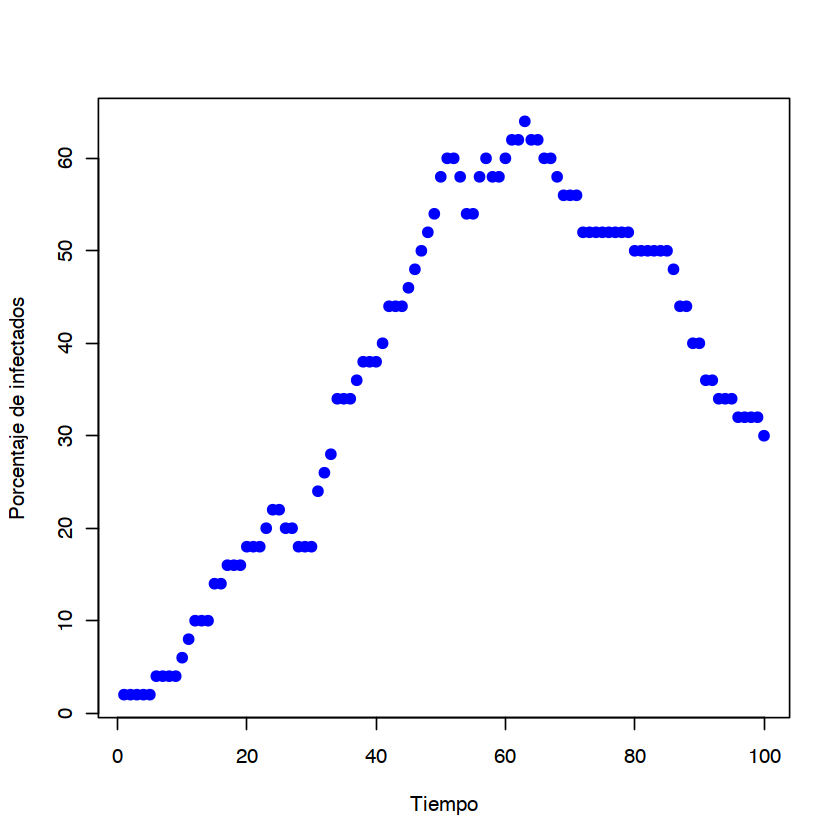

In [25]:
l <- 1.5
n <- 50
pi <- 0.05
pr <- 0.02
v <- l / 30
 
agentes <- data.frame(x = double(), y = double(),
                      dx = double(), dy = double(),
                      estado  = character())
for (i in 1:n) {
    e <- "S"
    if (runif(1) < pi) {
        e <- "I"
    }
    agentes <- rbind(agentes, data.frame(x = runif(1, 0, l),
                                         y = runif(1, 0, l),
                                         dx = runif(1, -v, v),
                                         dy = runif(1, -v, v),
                                         estado = e))
 
}
levels(agentes$estado) <- c("S", "I", "R")
epidemia <- integer()
r <- 0.1
tmax <- 100
digitos <- floor(log(tmax, 10)) + 1
for (tiempo in 1:tmax) {
    infectados <- dim(agentes[agentes$estado == "I",])[1]
    epidemia <- c(epidemia, infectados)
    if (infectados == 0) {
        break
    }
    contagios <- rep(FALSE, n)
    for (i in 1:n) { # posibles contagios
        a1 <- agentes[i, ]
        if (a1$estado == "I") { # desde los infectados
            for (j in 1:n) {
                if (!contagios[j]) { # aun sin contagio
                    a2 <- agentes[j, ]
                    if (a2$estado == "S") { # hacia los susceptibles
                        dx <- a1$x - a2$x
                        dy <- a1$y - a2$y
                        d <- sqrt(dx^2 + dy^2)
                        if (d < r) { # umbral
                            p <- (r - d) / r
                            if (runif(1) < p) {
                                contagios[j] <- TRUE
                            }
                        }
                    }
                }
            }
        }
    }
    for (i in 1:n) { # movimientos y actualizaciones
        a <- agentes[i, ]
        if (contagios[i]) {
            a$estado <- "I"
        } else if (a$estado == "I") { # ya estaba infectado
            if (runif(1) < pr) {
                a$estado <- "R" # recupera
            }
        }
        a$x <- a$x + a$dx
        a$y <- a$y + a$dy
        if (a$x > l) {
            a$x <- a$x - l
        }
        if (a$y > l) {
            a$y <- a$y - l
        }
        if (a$x < 0) {
            a$x <- a$x + l
        }
        if (a$y < 0) {
            a$y <- a$y + l
        }
        agentes[i, ] <- a
    }
    aS <- agentes[agentes$estado == "S",]
    aI <- agentes[agentes$estado == "I",]
    aR <- agentes[agentes$estado == "R",]
    tl <- paste(tiempo, "", sep="")
    while (nchar(tl) < digitos) {
        tl <- paste("0", tl, sep="")
    }
    
}
#png("p6e.png", width=600, height=300)
plot(1:length(epidemia), 100 * epidemia / n, xlab="Tiempo", ylab="Porcentaje de infectados", pch=19, col="blue")
#graphics.off()

In [29]:
png("sinmasc.png", width=600, height=300)
plot(1:length(epidemia), 100 * epidemia / n, xlab="Tiempo", ylab="Porcentaje de infectados", pch=19, col="blue", ylim=c(0,100))
graphics.off()